# Introduction
**Aunalytics - Digital Transformation Through Human Intelligence**


Title: Predicting Financial Outcome <br/>
Prepared by: Zaid M Masri <br/>
Date: Friday, July 17, 2020 <br/>
Version: 0.01 <br/>
Contact: zaidmasri2@gmail.com <br/>


1. Audience:
> This document's primary audiance is Aunalytics. Secondary audience members include - but not limited to - data science enthusiast, students, or someone interested in machine learning.  
2. Purpose:
> Demonstrate my ability to solve a data science problem using given information and making reasonable assumptions.
3. Subject:
> Predict if someone will make less than or equal to 50,000 USD or more than 50,000 USD. 

# Exploring Data & Data Preperation

## Importing Dependeancies

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
#from sklearn.metrics import classification_report , confusion_matrix, accuracy_score



import matplotlib.pyplot as plt

# Omitting warnings 
import warnings
warnings.filterwarnings('ignore')


## Loading .csv file into DataFrame

In [2]:
#Loading data into variable
#In order to train the model to the highest accuracy it would be best to concatinate both datasets and randomize the training model later on
#This ensures that both testing and training data are clean 
au_train = pd.read_csv("/Users/zaidmasri/Documents/Development/Python Projects/Aunalytics/au_train.csv")
au_test = pd.read_csv("/Users/zaidmasri/Documents/Development/Python Projects/Aunalytics/au_test.csv")


dataset = pd.concat([au_train, au_test])

## Exploratory Data Analysis (EDA) & Cleaning

### Observations & Resolutions

1. "class" is a Python reserved word & currently a column name
2. "?" character does not carry the NaN value 
3. Information is not standardized in the "class" column

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


### Data Cleaning

#### Unrecognized NaN Values

In [6]:
dataset[dataset == ' ?'] = np.nan #From NumPy
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

#### Handling Pre-reserved Word

In [7]:
dataset = dataset.rename(columns={'class':'income'}) #From pandas
dataset.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


#### Unifying Independent Variable 

In [8]:
dataset['income'] = dataset['income'].str.replace('<=50K.','<=50K')
dataset['income'] = dataset['income'].str.replace('>50K.','>50K')

In [9]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


#### Confirming dtypes

In [11]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### Pickling Clean Data for Later Use

In [12]:
with open('clean_dataset.pkl', 'wb') as pickle_file:
    pickle.dump(dataset,pickle_file)

## Visual Exploration of Clean Data

### Income Bar Chart

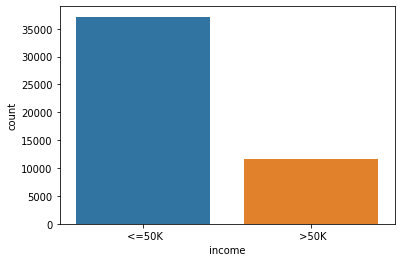

In [13]:
sns.countplot(dataset['income'])

In [14]:
dataset['income'].value_counts()/dataset['income'].count()*100

 <=50K    76.071823
 >50K     23.928177
Name: income, dtype: float64

### Numerical Features Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4bf439c50>,
      dtype=object)

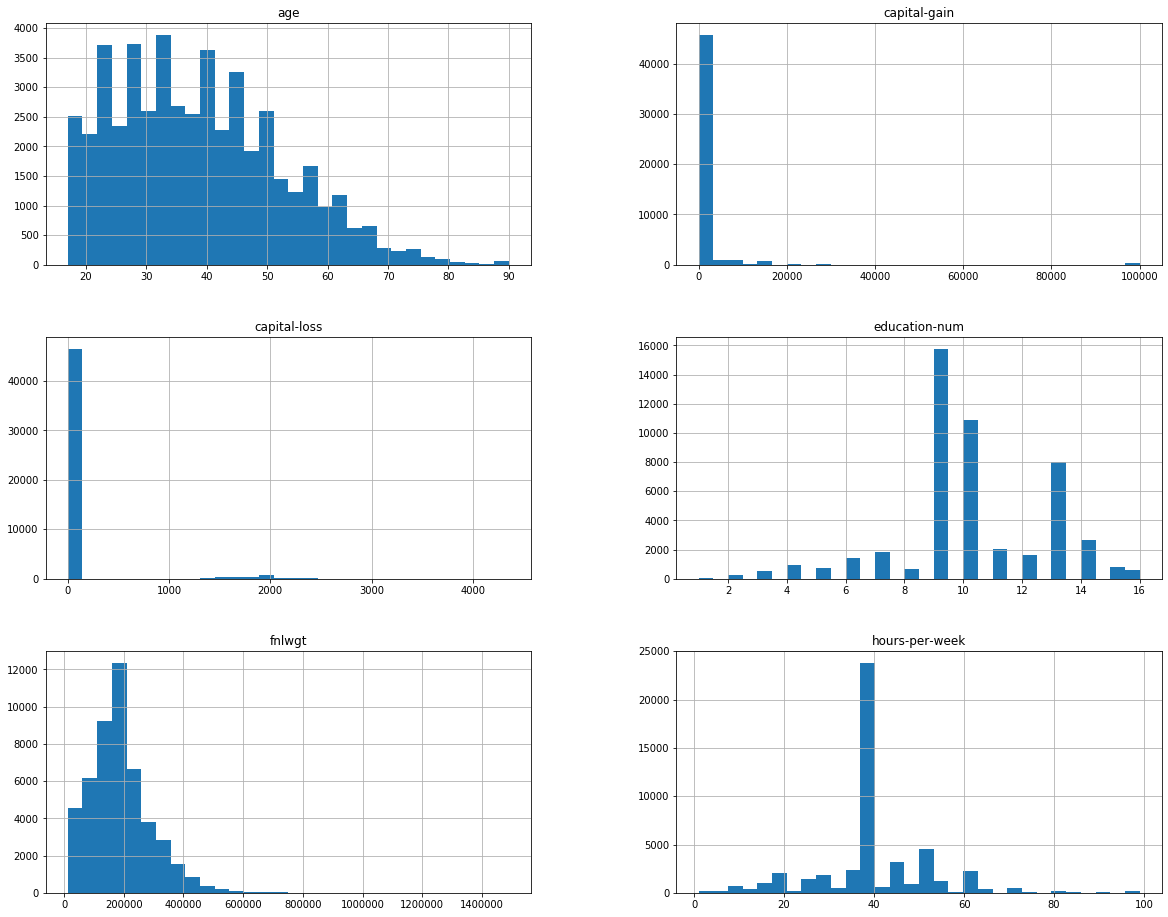

In [15]:
numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
numerical_features.hist(figsize = (20,16),bins = 30)

### Categorical Features Histograms

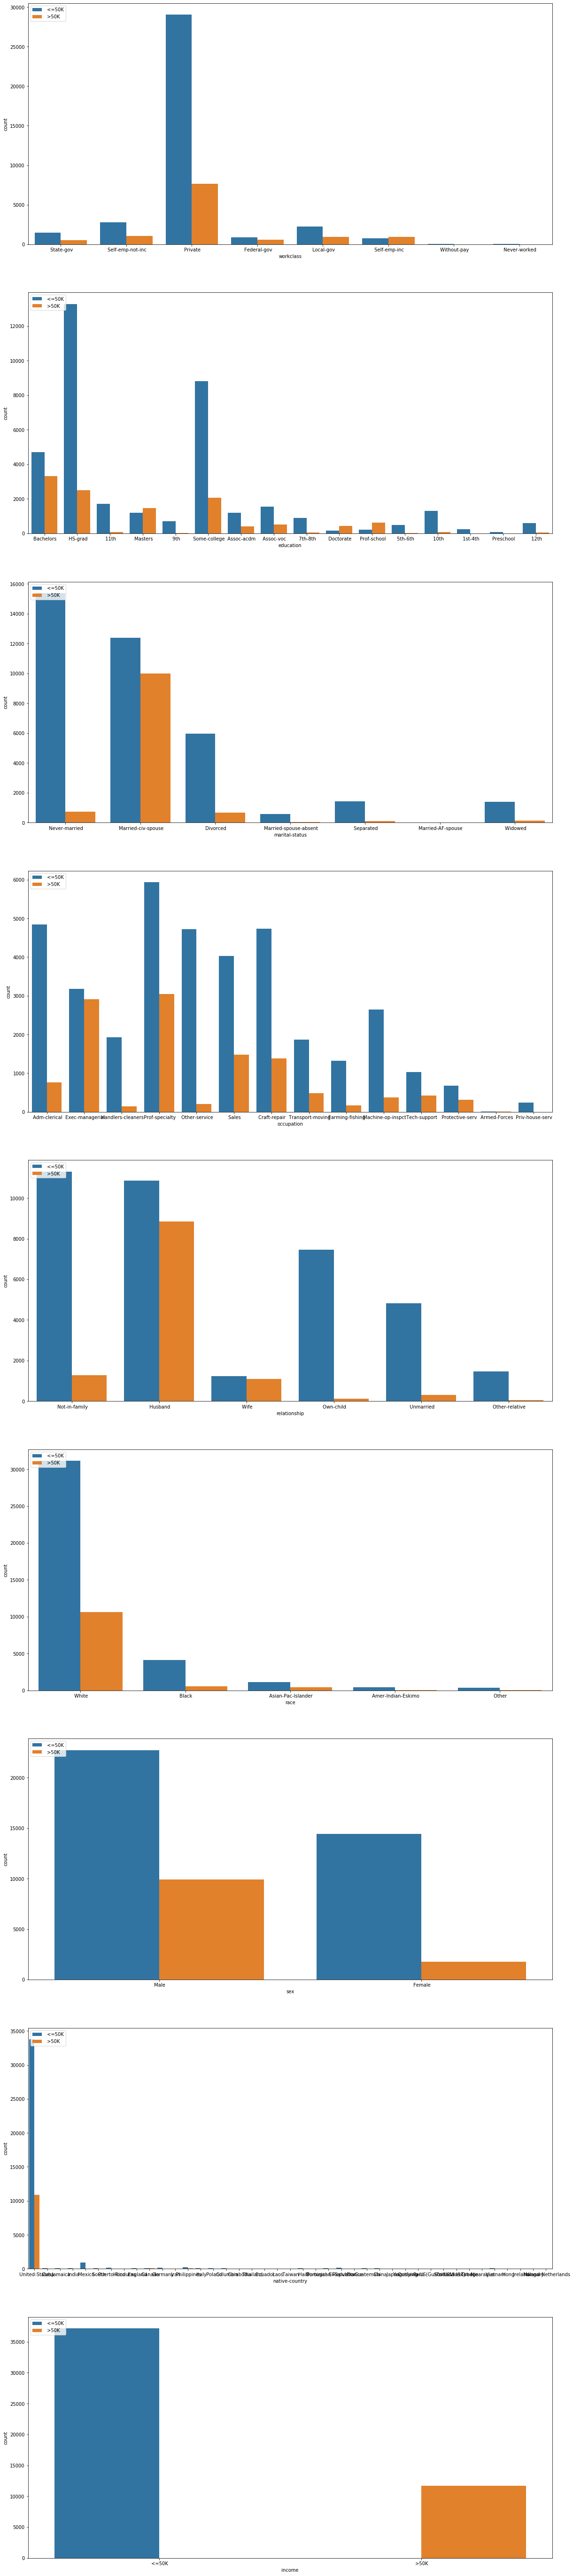

In [16]:
categorical_features = dataset.select_dtypes('object')

fig = plt.figure(figsize = (20,100))
for i,col in enumerate(categorical_features):
    ax1 = fig.add_subplot(9, 1, i+1)
    sns.countplot(dataset[col],hue = dataset['income'])
    plt.legend(loc = 'upper left')

# Model Testing

## Pre-processing

### Feature Scaling

In [22]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])
        
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

pca = PCA()
x_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.1845103 , 0.12486952, 0.10234758, 0.09424309, 0.09183609,
       0.08627768, 0.08559453, 0.07685258, 0.06314889, 0.05556315,
       0.03475658])

### Drop Unwanted Features

In [25]:
x = dataset.drop(['income' , 'native-country'], axis= 'columns')
y = dataset['income']

## Accuracy Tests

In [ ]:

seed = 7


# Params for Random Forest
num_trees = 100
max_features = 3

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.805522 (0.003657)
LDA: 0.808652 (0.004585)
KNN: 0.814765 (0.004750)
CART: 0.771476 (0.005166)
